In [1]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loc_P04 = '/home/saumya/Documents/Flame-diagonis-Dip/Schlieren-Data/German_data/cl19340rcch006/'
# loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [3]:
data = np.load(loc_P04+'cl19340rcch006.npy')

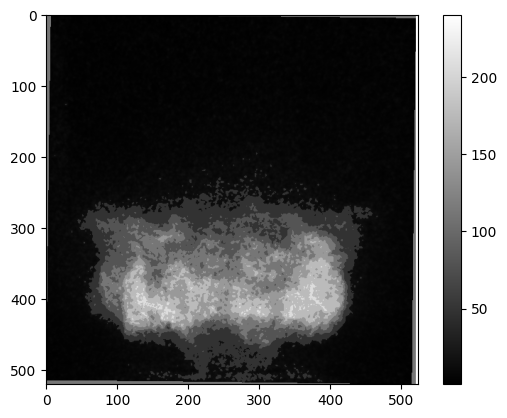

In [4]:
peg = plt.imshow(data[200], cmap='gray')
plt.colorbar(peg)

In [5]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(data[i], (9, 9), 9))
patches = np.array(patches)

In [6]:
patches.shape

(8192, 57, 58, 9, 9)

In [7]:
mean = np.zeros(patches.shape[:3])
# median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            # median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [8]:
mean.shape

(8192, 57, 58)

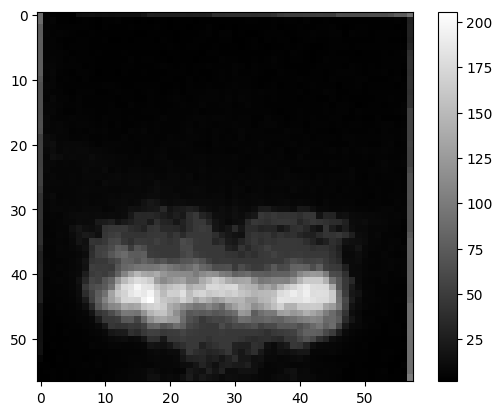

In [9]:
neg = plt.imshow(np.array(mean[100]), cmap='gray')
plt.colorbar(neg)

In [10]:
mean_all = np.mean(mean)
print(mean_all)
mean_adj = mean - mean_all

33.59635495847851


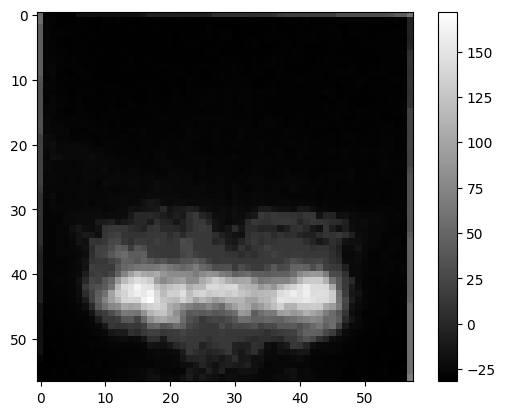

In [11]:
neg = plt.imshow(np.array(mean_adj[100]), cmap='gray')
plt.colorbar(neg)

In [12]:
cropped_data = []
for k in mean_adj:
    cropped_data.append(k[30:,7:50])
cropped_data = np.array(cropped_data)

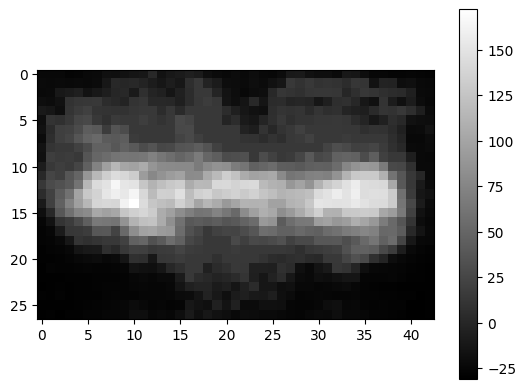

In [13]:
neg = plt.imshow(np.array(cropped_data[100]), cmap='gray')
plt.colorbar(neg)

In [14]:
sig = cropped_data[:, 12, 6]

In [15]:
import pywt

coeffs = pywt.wavedec(sig, 'db1', level=2)

In [16]:
cA2, cD2, cD1 = coeffs

In [17]:
np.shape(pywt.dwt(sig, 'db10'))

(2, 4105)

In [18]:
# plt.plot(abs(cA))

In [19]:
# from math import ceil, log2

In [20]:
# # Create signal
# xc = np.linspace(0, t_n, num=N)
# xd = np.linspace(0, t_n, num=32)
# sig = np.sin(2*np.pi * 64 * xc[:32]) * (1 - xd)
# composite_signal3 = np.concatenate([np.zeros(32), sig[:32], np.zeros(N-32-32)])

# # Use the Daubechies wavelet
# w = pywt.Wavelet('db1')
# # Perform Wavelet transform up to log2(N) levels
# lvls = ceil(log2(N))
# coeffs = pywt.wavedec(composite_signal3, w, level=lvls)
# # Each level of the WT will split the frequency band in two and apply a
# # WT on the highest band. The lower band then gets split into two again,
# # and a WT is applied on the higher band of that split. This repeats
# # 'lvls' times.
# #
# # Since the amount of samples in each step decreases, we need to make
# # sure that we repeat the samples 2^i times where i is the level so
# # that at each level, we have the same amount of transformed samples
# # as in the first level. This is only necessary because of plotting.
# cc = np.abs(np.array([coeffs[-1]]))
# for i in range(lvls - 1):
#     cc = np.concatenate(np.abs([cc, np.array([np.repeat(coeffs[lvls - 1 - i], pow(2, i + 1))])]))

# plt.figure()
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.title('Discrete Wavelet Transform')
# # X-axis has a linear scale (time)
# x = np.linspace(start=0, stop=1, num=N//2)
# # Y-axis has a logarithmic scale (frequency)
# y = np.logspace(start=lvls-1, stop=0, num=lvls, base=2)
# X, Y = np.meshgrid(x, y)
# plt.pcolormesh(X, Y, cc)

# use_log_scale = False

# if use_log_scale:
#     plt.yscale('log')
# else:
#     yticks = [pow(2, i) for i in range(lvls)]

In [21]:
wavelet = 'morl' # wavelet type: morlet
sr = 10*1000 # sampling frequency: 10KHz
widths = np.arange(1, 64) # scales for morlet wavelet
print("These are the scales that we are using: ", widths)
dt = 1/sr # timestep difference

frequencies = pywt.scale2frequency(wavelet, widths) / dt # Get frequencies corresponding to scales
print("These are the frequencies that re associated with the scales: ", frequencies)

These are the scales that we are using:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
These are the frequencies that re associated with the scales:  [8125.         4062.5        2708.33333333 2031.25       1625.
 1354.16666667 1160.71428571 1015.625       902.77777778  812.5
  738.63636364  677.08333333  625.          580.35714286  541.66666667
  507.8125      477.94117647  451.38888889  427.63157895  406.25
  386.9047619   369.31818182  353.26086957  338.54166667  325.
  312.5         300.92592593  290.17857143  280.17241379  270.83333333
  262.09677419  253.90625     246.21212121  238.97058824  232.14285714
  225.69444444  219.59459459  213.81578947  208.33333333  203.125
  198.17073171  193.45238095  188.95348837  184.65909091  180.55555556
  176.63043478  172.87234043  169.27083333  165.81632653  162.5
  159.31372549  156.25        153.

In [22]:
 	wavelet_coeffs, freqs = pywt.cwt(sig, widths, wavelet = wavelet, sampling_period=dt)

In [23]:
print("Shape of wavelet transform: ", wavelet_coeffs.shape)

Shape of wavelet transform:  (63, 8192)


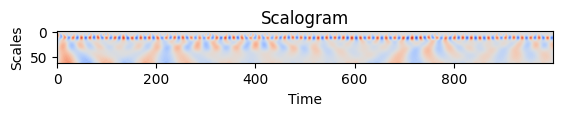

In [24]:
plt.imshow(wavelet_coeffs[:,:1000], cmap='coolwarm')
plt.xlabel("Time")
plt.ylabel("Scales")
# plt.yticks(widths[0::11])
plt.title("Scalogram")
plt.show()

In [25]:
Fs = 44100.0  #Samples per second
tclip = 10e-3
nos = int(Fs*tclip)  #No of samples in 10ms
tpoints = np.linspace(0, 10e-3, nos) #Time points
x = np.cos(2*np.pi*500*tpoints)  #cos(2*pi*f*t) signal

In [26]:
scales = np.arange(1, 21, 1)  #No. of scales=20
x[87:89] = 0  #Giving discontinuity
x[307:309] = 0  #Giving discontinuity

In [27]:
# coef, freqs = pywt.cwt(x, scales, 'gaus4')  # Finding CWT using gaussian wavelet

# # Plotting scalogram
# plt.figure(figsize=(15, 10))
# plt.imshow(abs(coef), extent=[0, 10e-3, 20, 1], interpolation='bilinear', cmap='copper',
#            aspect='auto', vmax=abs(coef).max(), vmin=abs(coef).max())
# plt.gca().invert_yaxis()
# plt.yticks(np.arange(1, 21, 1))
# plt.xticks(np.arange(0, nos/Fs, nos/(20*Fs)))
# plt.show()

# # Plotting
# # plt.figure(figsize=(15, 10))
# # plt.plot(tpoints, x)
# # plt.grid(color='gray', linestyle=':', linewidth=0.5)
# # plt.show()

In [40]:
fs = 10*1000
sampling_period = 1/fs
t = np.linspace(0, 8192, 8192)
# x = chirp(t,10,2,40,'quadratic')

# coef, freqs = pywt.cwt(sig, np.arange(1,100),'morl', 
# sampling_period=sampling_period)

coef, freqs = pywt.cwt(sig, np.arange(1, 100), 'morl',
                       sampling_period=sampling_period)

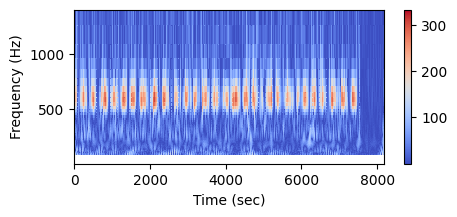

In [43]:
# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
neg = plt.pcolor(t, freqs, abs(coef), cmap='coolwarm')
plt.colorbar(neg)
# Set yscale, ylim and labels
# plt.yscale('log')
plt.ylim([1, 1400])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.savefig('egg_german.png', dpi=150)

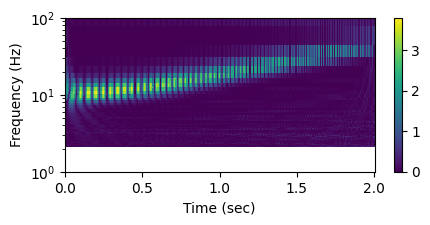

In [46]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import chirp

# Define signal
fs = 128
sampling_period = 1 / fs
t = np.linspace(0, 2, 2 * fs)
x = chirp(t, 10, 2, 40, 'quadratic')

# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(x, np.arange(1, 50), 'morl',
                       sampling_period=sampling_period)

# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
peg = plt.pcolor(t, freqs, abs(coef))

plt.colorbar(peg)
# Set yscale, ylim and labels
plt.yscale('log')
plt.ylim([1, 100])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.savefig('egg_synth.png', dpi=150)

In [32]:
t.shape

(256,)

In [33]:
freqs.shape

(49,)

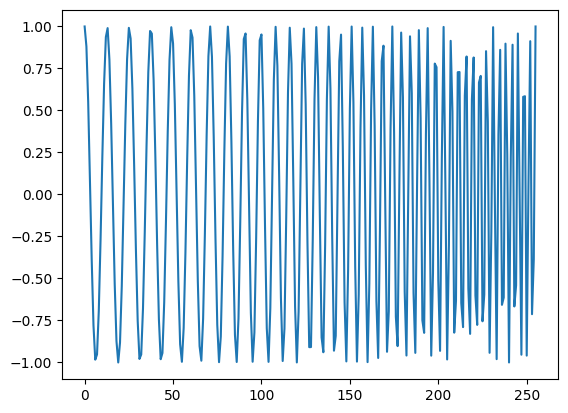

In [35]:
plt.plot(x)